In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def generate_test_signal(x, p=1):
    signal = np.sin(x)
    noise = np.random.normal(0, 1, 256*p)
    return signal+noise

In [4]:
def get_next(x_in, y_last, alpha):
    assert 0 <= alpha < 1, "alpha is not valid"
    return alpha*y_last + (1-alpha)*x_in

In [5]:
def filtering(in_signal, alpha):
    assert len(in_signal.shape) == 1, "input must be 1-D"
    length = in_signal.shape[0]
    out_signal = np.zeros(length)

    if len(in_signal) == 0:
        return out_signal

    out_signal[0] = in_signal[0]
    for i in range(1, length):
        out_signal[i] = get_next(in_signal[i], out_signal[i-1], alpha)
    
    return out_signal

In [44]:
def apply_style():
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)

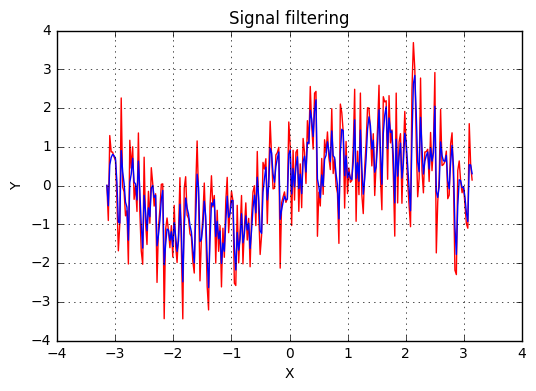

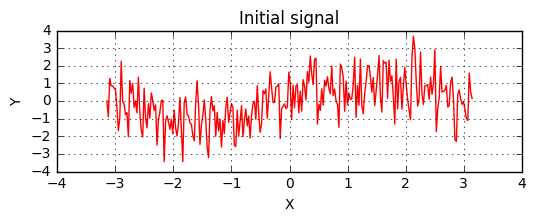

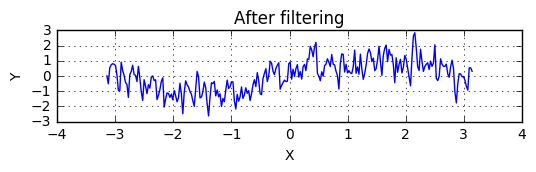

In [47]:
p = 1
alpha = 0.42

x = np.linspace(-np.pi*p, np.pi*p, 256*p)
signal = generate_test_signal(x, p)
processed_signal = filtering(signal, alpha)

plt.title("Signal filtering")
plt.grid(True)
plt.xlabel("X")
plt.ylabel("Y")

plt.figure(1)
plt.subplot(111)
apply_style()
plt.title("Signal filtering")
plt.plot(x, signal, 'r')
plt.plot(x, processed_signal, 'b')

plt.figure(2)
plt.subplot(211)
apply_style()
plt.title("Initial signal")
plt.plot(x, signal, 'r')

plt.figure(3)
plt.subplot(311)
apply_style()
plt.title("After filtering")
plt.plot(x, processed_signal, 'b')

plt.show()